<a href="https://colab.research.google.com/github/gchaewon/Euron5th_BusTayo/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 버스 승하차 데이터 EDA

서울시 버스 승하차 예측에 앞서 데이터 EDA 진행

서울시 버스 승하차 23/1 ~ 23/12월까지의 월별 서울시 승하차 데이터를 사용함

In [167]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

# 시각화
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# 지도 관련 시각화
import folium
from folium.plugins import MarkerCluster
import geopy.distance

# 데이터 로딩

In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


22/9 ~ 23/8까지 월별 서울시 버스 승하차 데이터

In [169]:
path = '/content/drive/MyDrive/Euron/프로젝트/'


data_files = ['bus_23_1.csv', 'bus_23_2.csv','bus_23_3.csv', 'bus_23_4.csv', 'bus_23_5.csv', 'bus_23_6.csv',
               'bus_23_7.csv', 'bus_23_8.csv', 'bus_23_9.csv', 'bus_23_10.csv', 'bus_23_11.csv', 'bus_23_12.csv']

data_df = [pd.read_csv(path+'train/'+f, encoding='cp949') for f in data_files]

data = pd.concat(data_df)

print(data.shape)
data.head(1)

(501270, 57)


,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,교통수단타입코드,교통수단타입명,등록일자
0,202301,741,741번(진관차고지~헌인릉입구),100000001,1001,종로2가사거리(00077),92,77,70,88,...,198,277,118,208,163,168,79,10,서울간선버스,20230203


In [170]:
data.tail(3)

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,교통수단타입코드,교통수단타입명,등록일자
41671,202312,9707,9707번(고양 가좌동~영등포역),999800005,~,가좌동종점(종점가상)(00078),0,5,0,12,...,2,0,2,0,3,0,1,50,서울광역버스,20240103
41672,202312,9701,9701번(가좌동~서울역),999800005,~,가좌동종점(종점가상)(00127),0,2,0,1,...,0,0,0,0,5,0,2,50,서울광역버스,20240103
41673,202312,151,151번(우이동~중앙대),~,~,외환은행(00999),0,0,0,0,...,0,0,0,0,0,0,0,10,서울간선버스,20240103


### 칼럼명 확인

In [171]:
data.columns

Index(['사용년월', '노선번호', '노선명', '표준버스정류장ID', '버스정류장ARS번호', '역명', '00시승차총승객수',
       '00시하차총승객수', '1시승차총승객수', '1시하차총승객수', '2시승차총승객수', '2시하차총승객수', '3시승차총승객수',
       '3시하차총승객수', '4시승차총승객수', '4시하차총승객수', '5시승차총승객수', '5시하차총승객수', '6시승차총승객수',
       '6시하차총승객수', '7시승차총승객수', '7시하차총승객수', '8시승차총승객수', '8시하차총승객수', '9시승차총승객수',
       '9시하차총승객수', '10시승차총승객수', '10시하차총승객수', '11시승차총승객수', '11시하차총승객수',
       '12시승차총승객수', '12시하차총승객수', '13시승차총승객수', '13시하차총승객수', '14시승차총승객수',
       '14시하차총승객수', '15시승차총승객수', '15시하차총승객수', '16시승차총승객수', '16시하차총승객수',
       '17시승차총승객수', '17시하차총승객수', '18시승차총승객수', '18시하차총승객수', '19시승차총승객수',
       '19시하차총승객수', '20시승차총승객수', '20시하차총승객수', '21시승차총승객수', '21시하차총승객수',
       '22시승차총승객수', '22시하차총승객수', '23시승차총승객수', '23시하차총승객수', '교통수단타입코드',
       '교통수단타입명', '등록일자'],
      dtype='object')

### 불필요한 칼럼 삭제

1) 노선명, 등록일자, 교통수단타입코드 삭제

In [172]:
data = data.drop(['노선명', '등록일자', '교통수단타입코드'], axis =1)
data.columns

Index(['사용년월', '노선번호', '표준버스정류장ID', '버스정류장ARS번호', '역명', '00시승차총승객수',
       '00시하차총승객수', '1시승차총승객수', '1시하차총승객수', '2시승차총승객수', '2시하차총승객수', '3시승차총승객수',
       '3시하차총승객수', '4시승차총승객수', '4시하차총승객수', '5시승차총승객수', '5시하차총승객수', '6시승차총승객수',
       '6시하차총승객수', '7시승차총승객수', '7시하차총승객수', '8시승차총승객수', '8시하차총승객수', '9시승차총승객수',
       '9시하차총승객수', '10시승차총승객수', '10시하차총승객수', '11시승차총승객수', '11시하차총승객수',
       '12시승차총승객수', '12시하차총승객수', '13시승차총승객수', '13시하차총승객수', '14시승차총승객수',
       '14시하차총승객수', '15시승차총승객수', '15시하차총승객수', '16시승차총승객수', '16시하차총승객수',
       '17시승차총승객수', '17시하차총승객수', '18시승차총승객수', '18시하차총승객수', '19시승차총승객수',
       '19시하차총승객수', '20시승차총승객수', '20시하차총승객수', '21시승차총승객수', '21시하차총승객수',
       '22시승차총승객수', '22시하차총승객수', '23시승차총승객수', '23시하차총승객수', '교통수단타입명'],
      dtype='object')

2) 심야 시간 10시 ~ 5시 데이터 삭제

In [173]:
hours_to_drop = ['22시승차총승객수', '22시하차총승객수', '23시승차총승객수', '23시하차총승객수',
                 '00시승차총승객수', '00시하차총승객수', '1시승차총승객수', '1시하차총승객수',
                 '2시승차총승객수', '2시하차총승객수', '3시승차총승객수', '3시하차총승객수',
                 '4시승차총승객수', '4시하차총승객수', '5시승차총승객수', '5시하차총승객수']

data = data.drop(columns=hours_to_drop, axis=1)

In [174]:
data.head(1)

,사용년월,노선번호,표준버스정류장ID,버스정류장ARS번호,역명,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,...,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,교통수단타입명
0,202301,741,100000001,1001,종로2가사거리(00077),140,62,509,300,425,...,462,319,501,363,411,282,198,277,118,서울간선버스


### id 피처 추가 및 피처명 변경

- id (데이터 고유값)
- month(월 단위)
- bus_route_id(표준 버스 정류장 ID)
- bus_id(노선 번호)
- station_code(버스 정류장 ARS 번호)
- station_name(역명)
- X~Y ride(1시간 단위 승차 총 승객 수)
- X~Y takeoff(1시간 단위 하차 총 승객 수)
- type(교통 수단 타입명)

In [175]:
data.insert(0, 'id', range(0, len(data)))
data.head(1)

,id,사용년월,노선번호,표준버스정류장ID,버스정류장ARS번호,역명,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,...,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,교통수단타입명
0,0,202301,741,100000001,1001,종로2가사거리(00077),140,62,509,300,...,462,319,501,363,411,282,198,277,118,서울간선버스


In [176]:
data.columns

Index(['id', '사용년월', '노선번호', '표준버스정류장ID', '버스정류장ARS번호', '역명', '6시승차총승객수',
       '6시하차총승객수', '7시승차총승객수', '7시하차총승객수', '8시승차총승객수', '8시하차총승객수', '9시승차총승객수',
       '9시하차총승객수', '10시승차총승객수', '10시하차총승객수', '11시승차총승객수', '11시하차총승객수',
       '12시승차총승객수', '12시하차총승객수', '13시승차총승객수', '13시하차총승객수', '14시승차총승객수',
       '14시하차총승객수', '15시승차총승객수', '15시하차총승객수', '16시승차총승객수', '16시하차총승객수',
       '17시승차총승객수', '17시하차총승객수', '18시승차총승객수', '18시하차총승객수', '19시승차총승객수',
       '19시하차총승객수', '20시승차총승객수', '20시하차총승객수', '21시승차총승객수', '21시하차총승객수',
       '교통수단타입명'],
      dtype='object')

In [177]:
columns={'사용년월':'month', '노선번호': 'bus_id', '교통수단타입명': 'type',
         '버스정류장ARS번호': 'station_code', '표준버스정류장ID': 'bus_route_id', '역명':'station_name'}

data.rename(columns=columns, inplace=True)

In [178]:
# 승하차 칼럼명 변경
for hour in range(6, 22):
    ride_column = f'{hour}시승차총승객수'
    new_ride_column = f'{hour}~{hour+1}_ride'
    data.rename(columns={ride_column: new_ride_column}, inplace=True)

    takeoff_column = f'{hour}시하차총승객수'
    new_takeoff_column = f'{hour}~{hour+1}_takeoff'
    data.rename(columns={takeoff_column: new_takeoff_column}, inplace=True)


In [179]:
data.head(1)

,id,month,bus_id,bus_route_id,station_code,station_name,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,...,17~18_takeoff,18~19_ride,18~19_takeoff,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff,type
0,0,202301,741,100000001,1001,종로2가사거리(00077),140,62,509,300,...,462,319,501,363,411,282,198,277,118,서울간선버스


### 심야버스 필터링

In [180]:
data = data[data['type'] != '서울심야버스']
count = data[data['type'] == '서울심야버스'].shape[0]
print(f'서울심야버스인 행의 개수: {count}')

서울심야버스인 행의 개수: 0


# EDA

In [181]:
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

구조 확인

In [182]:
data.head()

,id,month,bus_id,bus_route_id,station_code,station_name,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,...,17~18_takeoff,18~19_ride,18~19_takeoff,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff,type
0,0,202301,741,100000001,1001,종로2가사거리(00077),140,62,509,300,...,462,319,501,363,411,282,198,277,118,서울간선버스
1,1,202301,470,100000001,1001,종로2가사거리(00067),194,59,558,271,...,545,337,473,292,337,284,172,284,165,서울간선버스
4,4,202301,100,100000002,1002,창경궁.서울대학교병원(00031),41,217,144,422,...,75,160,53,54,26,64,45,44,36,서울간선버스
6,6,202301,104,100000002,1002,창경궁.서울대학교병원(00024),96,378,204,589,...,59,230,48,78,35,47,50,24,87,서울간선버스
8,8,202301,171,100000002,1002,창경궁.서울대학교병원(00012),89,182,297,433,...,69,501,50,138,33,89,24,110,21,서울간선버스


In [183]:
data.shape

(452020, 39)

통계치 확인

In [184]:
data.describe()

,id,month,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,9~10_ride,9~10_takeoff,...,17~18_ride,17~18_takeoff,18~19_ride,18~19_takeoff,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff
count,452020.000000,452020.000000,452020.000000,452020.000000,452020.000000,452020.000000,452020.000000,452020.000000,452020.000000,452020.000000,...,452020.000000,452020.000000,452020.000000,452020.000000,452020.000000,452020.000000,452020.000000,452020.000000,452020.000000,452020.000000
mean,250987.319532,202306.510011,102.304407,87.652478,232.397816,194.427032,291.006732,299.037728,207.204004,213.582437,...,261.827499,248.599491,291.011999,285.377957,211.459088,228.120829,163.419165,164.358885,154.586025,151.667913
std,144675.580888,3.443961,159.340998,178.549830,333.859045,396.377287,411.956292,498.962367,295.455970,350.482505,...,379.407065,310.353987,457.617652,350.051624,387.381952,280.582459,302.276434,207.486109,299.171255,194.606875
min,0.000000,202301.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125495.750000,202304.000000,10.000000,11.000000,32.000000,28.000000,48.000000,54.000000,36.000000,39.000000,...,49.000000,59.000000,49.000000,65.000000,32.000000,48.000000,22.000000,33.000000,18.000000,29.000000
50%,250545.500000,202307.000000,47.000000,38.000000,119.000000,84.000000,162.000000,154.000000,117.000000,110.000000,...,149.000000,163.000000,153.000000,185.000000,103.000000,144.000000,75.000000,101.000000,65.000000,90.000000
75%,375857.250000,202310.000000,129.000000,96.000000,302.000000,205.000000,381.000000,352.000000,270.000000,250.000000,...,331.000000,331.000000,354.000000,381.000000,240.000000,305.000000,182.000000,218.000000,167.000000,201.000000
max,501269.000000,202312.000000,7399.000000,5090.000000,12281.000000,13058.000000,21580.000000,16078.000000,14190.000000,10388.000000,...,12694.000000,13313.000000,10895.000000,12954.000000,10757.000000,8102.000000,8780.000000,6343.000000,9418.000000,5724.000000


결측치 및 이상치 확인

<Axes: >

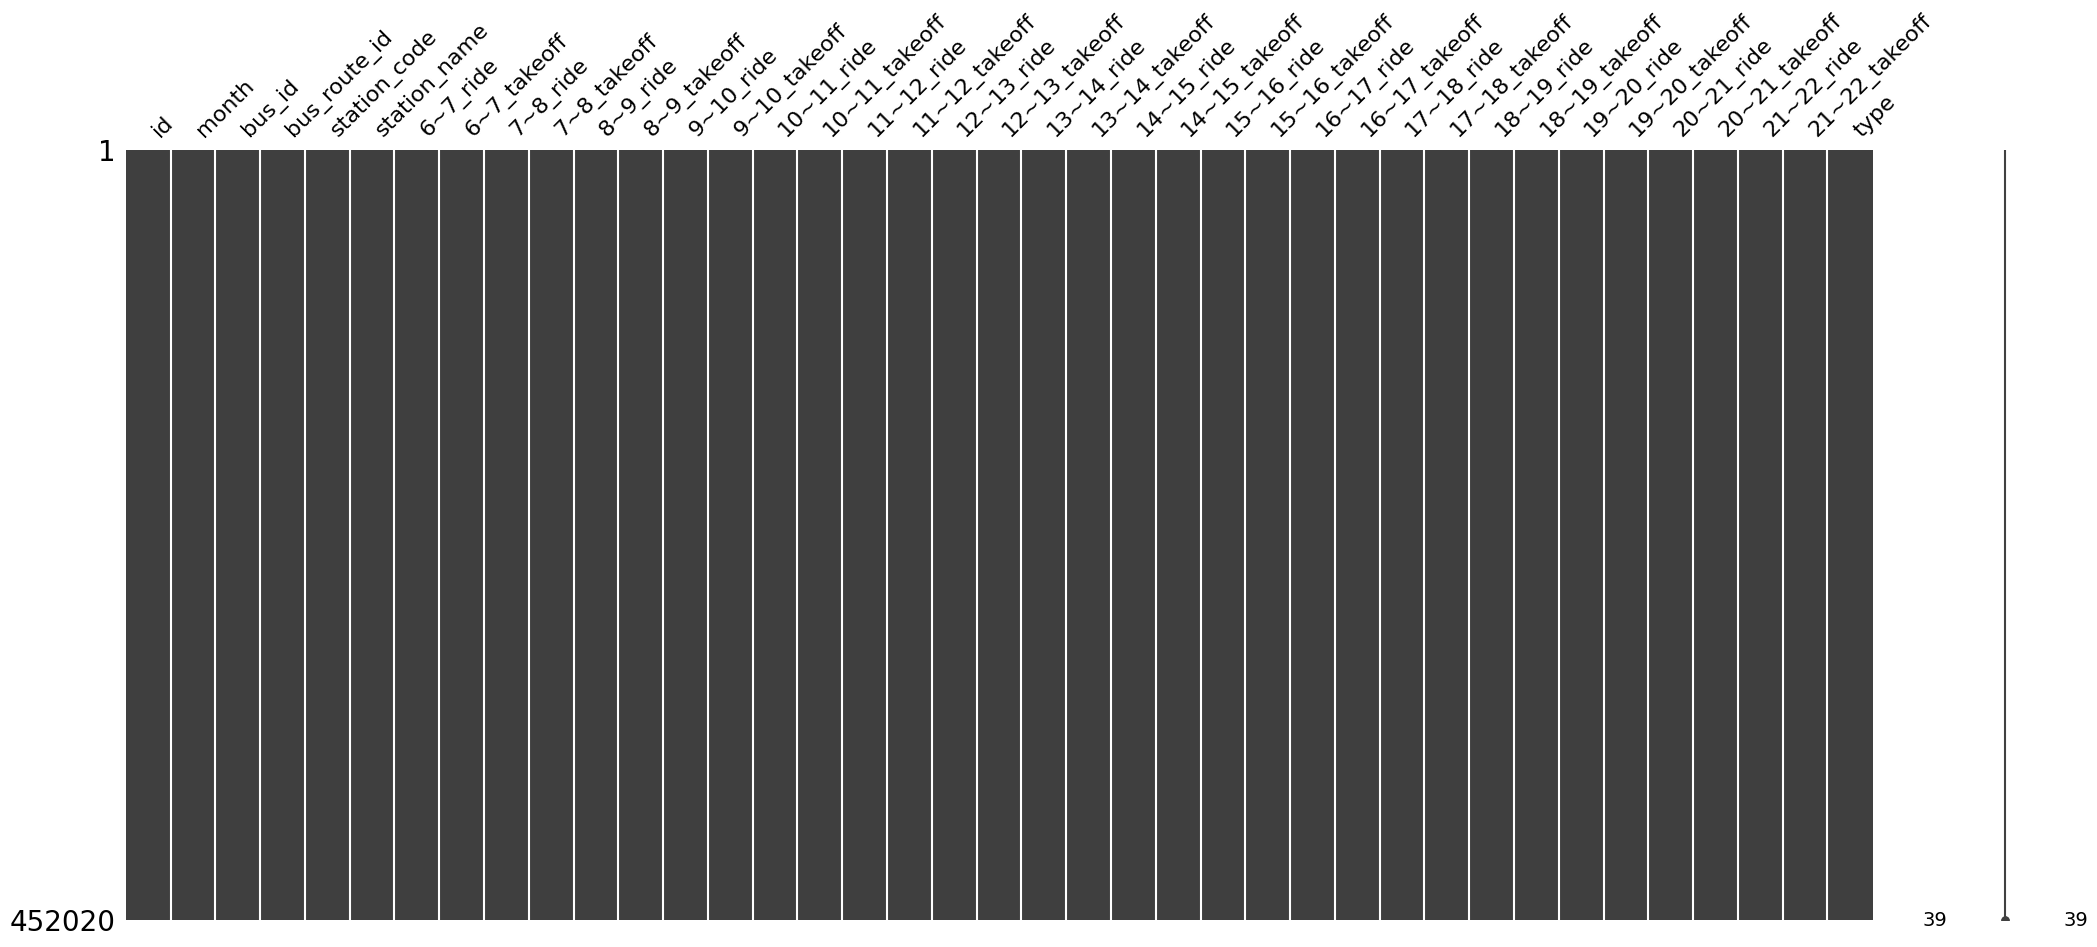

In [185]:
msno.matrix(data)

In [186]:
print(data.isnull().sum())

id               0
month            0
bus_id           0
bus_route_id     0
station_code     0
station_name     0
6~7_ride         0
6~7_takeoff      0
7~8_ride         0
7~8_takeoff      0
8~9_ride         0
8~9_takeoff      0
9~10_ride        0
9~10_takeoff     0
10~11_ride       0
10~11_takeoff    0
11~12_ride       0
11~12_takeoff    0
12~13_ride       0
12~13_takeoff    0
13~14_ride       0
13~14_takeoff    0
14~15_ride       0
14~15_takeoff    0
15~16_ride       0
15~16_takeoff    0
16~17_ride       0
16~17_takeoff    0
17~18_ride       0
17~18_takeoff    0
18~19_ride       0
18~19_takeoff    0
19~20_ride       0
19~20_takeoff    0
20~21_ride       0
20~21_takeoff    0
21~22_ride       0
21~22_takeoff    0
type             0
dtype: int64


주요 퇴근 시간 (17-20) 승차 데이터 분포 확인

0 값이 많음

In [187]:
target_col = ['17~18_ride', '18~19_ride', '19~20_ride']
data[target_col].value_counts().sort_index()

17~18_ride  18~19_ride  19~20_ride
0           0           0             11433
                        1              1032
                        2               308
                        3               118
                        4                51
                                      ...  
10812       4926        2598              1
11784       4845        2932              1
12052       4563        2793              1
12623       5191        2906              1
12694       5054        2999              1
Length: 373970, dtype: int64

<Axes: ylabel='Density'>

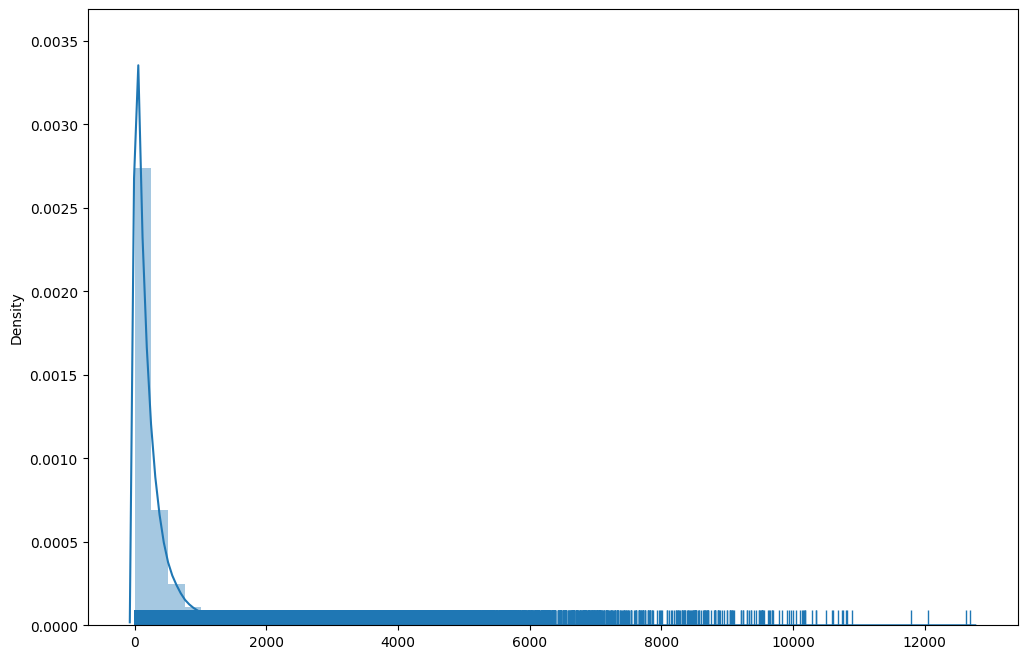

In [188]:
plt.figure(figsize=(12,8))
sns.distplot(data[target_col], rug=True)

하차, 승차 데이터가 1:1 매핑이 아닌 것을 확인할 수 있음

In [189]:
# 탑승 columns, 하차 columns
ride_columns = [col for col in data.columns if '_ride' in col]
take_off_columns = [col for col in data.columns if '_takeoff' in col]

# 승차 칼럼들의 rowsum
print("승차 칼럼 총 합")
display(data[data['18~19_ride']==0][ride_columns].sum(axis=1).agg(['min','max']) )
print("=====================")

# 하차 칼럼들의 rowsum
print("하차 칼럼 총 합")
display(data[data['18~19_takeoff']==0][take_off_columns].sum(axis=1).agg(['min','max']) )
print("=====================")

# 승하차 합 칼럼들의 rowsum
print("승하차 칼럼 총 합")
display(data[data['18~19_ride']==0][ride_columns + take_off_columns].sum(axis=1).agg(['min','max']) )

승차 칼럼 총 합


min        0
max    10791
dtype: int64

하차 칼럼 총 합


min       0
max    9942
dtype: int64

승하차 칼럼 총 합


min        0
max    43464
dtype: int64

## 시간대별 승하차 통계

In [190]:
df = pd.DataFrame(data)

# 시간대별 ride와 takeoff 값의 합을 구해서 새로운 칼럼으로 추가
df['ride'] = df.filter(regex='_ride').sum(axis=1)
df['takeoff'] = df.filter(regex='_takeoff').sum(axis=1)
df= df.groupby('station_code').sum().reset_index()

In [191]:
df.columns

Index(['station_code', 'id', 'month', '6~7_ride', '6~7_takeoff', '7~8_ride',
       '7~8_takeoff', '8~9_ride', '8~9_takeoff', '9~10_ride', '9~10_takeoff',
       '10~11_ride', '10~11_takeoff', '11~12_ride', '11~12_takeoff',
       '12~13_ride', '12~13_takeoff', '13~14_ride', '13~14_takeoff',
       '14~15_ride', '14~15_takeoff', '15~16_ride', '15~16_takeoff',
       '16~17_ride', '16~17_takeoff', '17~18_ride', '17~18_takeoff',
       '18~19_ride', '18~19_takeoff', '19~20_ride', '19~20_takeoff',
       '20~21_ride', '20~21_takeoff', '21~22_ride', '21~22_takeoff', 'ride',
       'takeoff'],
      dtype='object')

### 1) 승차 통계

In [192]:
ride_columns = [col for col in data.columns if '_ride' in col]
ride = df[ride_columns]
ride.head(3)

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,12~13_ride,13~14_ride,14~15_ride,15~16_ride,16~17_ride,17~18_ride,18~19_ride,19~20_ride,20~21_ride,21~22_ride
0,4205,12662,12994,11823,9652,10369,9904,9627,8283,8443,7189,8427,9361,8658,7463,7732
1,18572,51765,80835,61841,46462,46389,42483,38284,47214,65348,71935,84674,72054,35154,39664,18673
2,30951,59806,79130,66032,59361,64783,76224,82471,81158,97872,100632,110129,106860,77742,82646,100155


In [193]:
ride.describe()

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,12~13_ride,13~14_ride,14~15_ride,15~16_ride,16~17_ride,17~18_ride,18~19_ride,19~20_ride,20~21_ride,21~22_ride
count,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000
mean,3520.910461,7998.207781,10015.293361,7131.137049,5697.826633,5590.118547,6124.051393,6384.688138,6408.559616,7251.632024,8270.460941,9011.060302,10015.474646,7277.580097,5624.237171,5320.235648
std,6247.081509,13492.185377,17723.700296,12667.401358,9804.442138,9674.339915,10727.478275,11445.787111,11773.182146,13594.551961,15582.716939,17926.806119,21476.563432,17233.037626,13731.531424,13568.639393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178.000000,551.250000,780.000000,566.000000,502.000000,499.500000,547.000000,560.000000,563.000000,625.250000,690.000000,691.000000,659.000000,426.000000,294.000000,238.000000
50%,1108.500000,2882.000000,3631.500000,2519.000000,2100.000000,2037.000000,2217.000000,2283.000000,2238.000000,2485.500000,2763.500000,2785.000000,2766.500000,1835.000000,1338.500000,1130.500000
75%,4052.750000,9614.000000,11497.250000,8200.750000,6751.500000,6575.000000,7153.500000,7274.750000,7191.500000,8054.000000,9055.000000,9374.000000,9783.750000,6733.250000,5019.250000,4493.000000
max,99557.000000,228935.000000,278900.000000,200512.000000,156591.000000,142053.000000,170189.000000,191559.000000,205949.000000,244495.000000,271679.000000,300446.000000,406520.000000,382943.000000,279307.000000,279734.000000


### 시간대별 승차 인원 평균 값

7-9시에 많이 승차 - 출근시간

17-19시에 많이 승차 - 퇴근시간

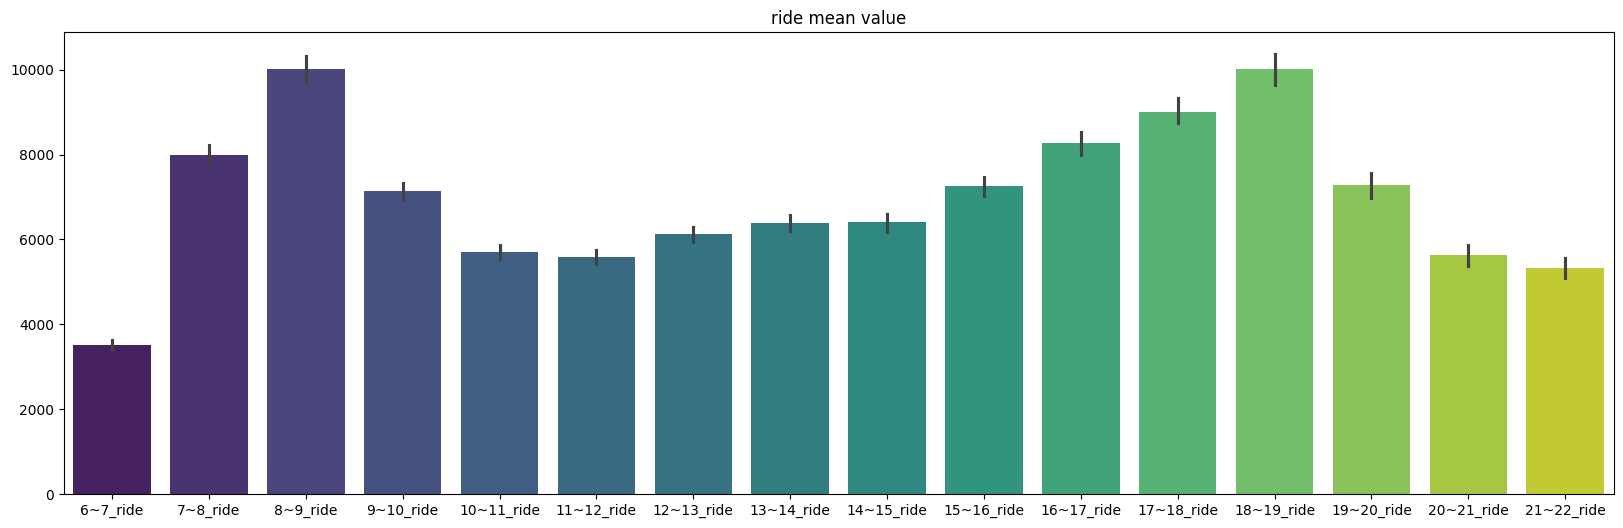

In [194]:
plt.figure(figsize=(20, 6))
sns.barplot(data=ride, palette='viridis')
plt.title('ride mean value')
plt.show()

### 2) 하차 통계

In [195]:
takeoff_columns = [col for col in data.columns if '_takeoff' in col]
takeoff = df[takeoff_columns]
takeoff.head(3)

,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,12~13_takeoff,13~14_takeoff,14~15_takeoff,15~16_takeoff,16~17_takeoff,17~18_takeoff,18~19_takeoff,19~20_takeoff,20~21_takeoff,21~22_takeoff
0,1931,7256,9116,10875,9110,10595,10540,11198,10887,10529,11399,13102,14540,11120,5950,5271
1,46604,94484,162695,92918,51350,33757,33145,38852,39105,25048,20288,17227,15655,10066,6691,8510
2,35184,66951,131410,94857,72400,65563,62236,65152,60600,48581,47197,50235,48396,32766,23291,21159


In [196]:
takeoff.describe()

,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,12~13_takeoff,13~14_takeoff,14~15_takeoff,15~16_takeoff,16~17_takeoff,17~18_takeoff,18~19_takeoff,19~20_takeoff,20~21_takeoff,21~22_takeoff
count,13134.000000,13134.000000,13134.00000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000,13134.000000
mean,3016.649383,6691.404523,10291.68829,7350.657302,5705.192173,5445.189356,5859.514009,6234.256586,6169.636820,6908.867139,7837.747602,8555.804934,9821.573321,7851.010888,5656.578575,5219.805847
std,7381.048683,16675.650572,22469.53240,15790.230249,11455.423137,10763.558453,11150.067498,11530.001445,11115.120741,11990.851677,13456.932598,15009.681636,17120.267560,12825.190963,9315.323444,8665.546606
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.250000,445.000000,831.25000,613.250000,556.000000,557.000000,635.000000,687.000000,702.250000,826.000000,918.250000,957.000000,1035.250000,806.500000,561.000000,496.250000
50%,795.500000,1744.000000,3225.50000,2227.500000,1950.500000,1935.500000,2187.000000,2366.500000,2450.500000,2847.500000,3242.000000,3441.000000,3902.500000,3224.000000,2287.000000,2063.500000
75%,2700.250000,5999.750000,10131.75000,7097.000000,5889.000000,5709.750000,6350.000000,6889.000000,6959.250000,7990.000000,9133.750000,9800.750000,11436.750000,9580.750000,6880.750000,6294.750000
max,209585.000000,500906.000000,668455.00000,431700.000000,247185.000000,204447.000000,206306.000000,209655.000000,197673.000000,206235.000000,239206.000000,229810.000000,265727.000000,223703.000000,169342.000000,158138.000000


### 시간대별 하차 평균값

승차와 유사한 그래프 형태를 띔

8-10시에 많이 하차 - 출근 시간

17-19에 많이 하차 - 퇴근 시간

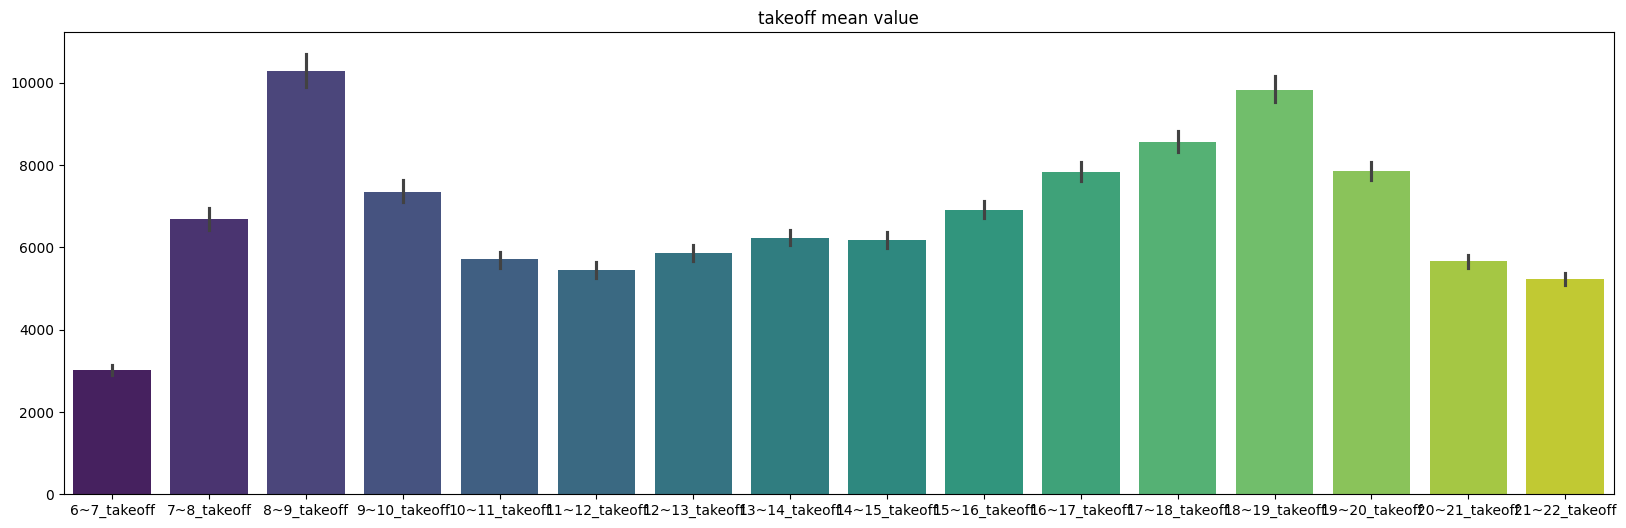

In [197]:
plt.figure(figsize=(20, 6))
sns.barplot(data=takeoff, palette='viridis')
plt.title('takeoff mean value')
plt.show()

## 정류장별 승하차 인원 통계

7-9시, 17-19시 승하차 인원 총합 top 20

### 0) 버스정류장 위도경도 데이터 로딩

https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

In [198]:
location = pd.read_csv(path+'/data/station_info.csv',encoding='cp949')
location.head(3)

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,버스도착정보안내기_설치_여부
0,100000001,종로2가사거리,중앙차로,1001.0,37.569806,126.987752,설치
1,100000002,창경궁.서울대학교병원,중앙차로,1002.0,37.579433,126.996521,설치
2,100000003,명륜3가.성대입구,중앙차로,1003.0,37.582580,126.998251,설치


불필요한 데이터 삭제 및 칼럼명 변경

In [199]:
location = location.drop(['정류장_ID', '정류장_유형', '버스도착정보안내기_설치_여부'], axis =1)
location.columns

Index(['정류장_명칭', '정류장_번호', '위도', '경도'], dtype='object')

In [200]:
columns={'정류장_명칭':'station_name', '정류장_번호': 'station_code',
         '위도': 'lat', '경도':'lng'}

location.rename(columns=columns, inplace=True)
location.columns

Index(['station_name', 'station_code', 'lat', 'lng'], dtype='object')

### 1) 출퇴근 시간 승차 top 20 정류장



In [201]:
df['main_ride'] = df['7~8_ride'] + df['8~9_ride'] + df['17~18_ride'] + df['18~19_ride']
top_ride = df.nlargest(20, 'main_ride')
top_ride


,station_code,id,month,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,9~10_ride,...,18~19_takeoff,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff,ride,takeoff,main_ride
8322,21002,27520895,20837588,49666,170802,110527,445209,179883,514108,104820,...,209087,382943,127618,279307,79383,279734,61705,2865513,3230911,979626
7433,19112,40739087,32571338,39175,39513,99331,66917,234625,114858,116315,...,189133,256273,112347,241112,80211,214568,50669,2881383,1915277,928185
8805,22019,63627865,48755888,44241,69063,126037,110288,144029,125339,115999,...,219845,297228,170137,260093,120550,230371,114425,3151630,2385424,904933
6581,17013,37318478,29941360,36094,14999,57748,33667,101878,96624,61263,...,89158,318303,67915,230362,47722,236148,48353,2424708,811489,797572
5134,14015,59621458,48148958,43797,45756,87294,119059,163164,164230,159534,...,194134,252026,128279,226750,80790,256337,63584,2861699,2035120,769633
8798,22012,62168723,47339752,52442,25262,121213,39570,159744,68769,146112,...,219308,198093,133995,174875,79982,207728,63685,2740290,1624030,762574
8806,22020,64315632,49969706,66983,106953,120010,172827,184165,247791,168866,...,221467,198097,151302,176980,101417,151058,91366,2728611,3005975,744133
10238,23408,33614089,26097529,47157,32094,89511,54670,155402,53525,85823,...,41185,247228,30184,173038,24339,164708,21904,2156329,570567,719455
588,3162,34088556,29739054,43754,17160,115305,44780,176404,67960,181922,...,64899,165062,46383,116531,32361,104952,29377,2282419,685670,714839
2876,9012,57585115,48351259,36200,36812,64292,82214,128500,103662,107205,...,265727,245553,223703,206247,167667,169336,158138,2642247,2414074,706082


top20 승차 정류장 위치 정보 구하기

In [202]:
top_ride_station = location[location['station_code'].isin(top_ride['station_code'])]

top_ride_station

,station_name,station_code,lat,lng
792,순천향대학병원,3162.0,37.536442,127.005730
2211,청량리역환승센터,6019.0,37.580303,127.045723
2289,회기역,6502.0,37.590123,127.057848
3389,수유역.강북구청,9004.0,37.637592,127.025308
3396,미아사거리역,9011.0,37.613762,127.029933
3397,미아사거리역,9012.0,37.612894,127.030213
6212,홍대입구역,14015.0,37.556640,126.923465
7745,신도림역,17001.0,37.509676,126.889223
7757,구로디지털단지역,17013.0,37.483099,126.901548
8802,경방타임스퀘어.신세계백화점,19112.0,37.517508,126.906240


In [203]:
import folium
from folium.plugins import MarkerCluster

# 서울 주요 장소의 임의 지역 위도, 경도
seoul = (37.5665, 126.9780)  # 서울 중심지

# 서울 지역이 보일 수 있는 위치의 위도, 경도를 표시한 뒤, folium.Map에 변수로 넣고, map_osm에 할당
map_osm = folium.Map(location=seoul, zoom_start=12)
mc = MarkerCluster()

mc.add_child(folium.Marker(location=seoul, popup='서울 중심지', icon=folium.Icon(color='red', icon='info-sign')))
map_osm.add_child(mc)

for row in top_ride_station.itertuples():
    mc.add_child(folium.Marker(location=[row.lat,  row.lng], popup=row.station_name)) #마커 생성
    map_osm.add_child(mc) #마커를 map_osm에 추가

map_osm


### 2) 출퇴근 시간 하차 top 20 정류장

In [204]:
df['main_takeoff'] = df['7~8_takeoff'] + df['8~9_takeoff'] + df['17~18_takeoff'] + df['18~19_takeoff']
top_takeoff = df.nlargest(20, 'main_takeoff')
top_takeoff

,station_code,id,month,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,9~10_ride,...,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff,ride,takeoff,main_ride,main_takeoff
8321,21001,41230563,32369038,57031,209585,112189,500906,167031,668455,104891,...,134049,153654,96061,97495,86234,79046,1592504,3956997,574775,1640101
8322,21002,27520895,20837588,49666,170802,110527,445209,179883,514108,104820,...,382943,127618,279307,79383,279734,61705,2865513,3230911,979626,1354913
8341,21117,34114142,26704458,23533,138697,35412,324288,52457,405221,37100,...,67901,120388,52739,78416,51861,61814,710639,2672827,220095,1027207
7903,20114,34998217,27311385,9379,129520,27137,314666,41682,445966,34303,...,31219,75120,24208,56708,25230,49368,447837,2427536,149522,1009190
8806,22020,64315632,49969706,66983,106953,120010,172827,184165,247791,168866,...,198097,151302,176980,101417,151058,91366,2728611,3005975,744133,861589
6570,17002,39760904,31762123,28499,133768,76035,280134,110937,295753,69744,...,49634,72848,38653,48901,38212,41330,915078,2242799,314946,858822
5135,14016,44672113,36010568,17855,60197,41112,153279,67193,190736,42303,...,137126,136563,133014,98335,147546,81487,1372621,2439570,392387,781344
3291,10015,34712047,28929835,30885,115913,50899,263848,66787,298559,53253,...,57706,70385,43851,47810,36793,38058,844768,1999061,248014,772332
4412,12381,39346575,31762142,20550,101683,43319,256841,63763,283363,31757,...,12829,47050,9333,34434,7995,30519,346245,1667495,139747,703709
1588,6015,45351334,39045154,47524,91711,85123,173174,123531,251955,101339,...,102272,77021,94544,54032,75746,51809,1625081,2278309,456039,689165


top20 하차 정류장 위치 정보 구하기

In [205]:
top_takeoff_station = location[location['station_code'].isin(top_takeoff['station_code'])]

top_takeoff_station

,station_name,station_code,lat,lng
795,순천향대학병원.한남오거리,3165.0,37.535491,127.005729
1963,청량리역환승센타,6015.0,37.580403,127.045431
3389,수유역.강북구청,9004.0,37.637592,127.025308
3397,미아사거리역,9012.0,37.612894,127.030213
3561,롯데백화점미아점,9277.0,37.614709,127.030756
3591,수유(강북구청)역,9013.0,37.638290,127.025870
3892,쌍문역,10015.0,37.648817,127.034769
5140,녹번역,12381.0,37.600872,126.934226
6204,홍대입구역,14016.0,37.557326,126.924316
6212,홍대입구역,14015.0,37.556640,126.923465


In [206]:
import folium
from folium.plugins import MarkerCluster

# 서울 주요 장소의 임의 지역 위도, 경도
seoul = (37.5665, 126.9780)  # 서울 중심지

# 서울 지역이 보일 수 있는 위치의 위도, 경도를 표시한 뒤, folium.Map에 변수로 넣고, map_osm에 할당
map_osm = folium.Map(location=seoul, zoom_start=11)
mc = MarkerCluster()

mc.add_child(folium.Marker(location=seoul, popup='서울 중심지', icon=folium.Icon(color='red', icon='info-sign')))
map_osm.add_child(mc)

for row in top_takeoff_station.itertuples():
    mc.add_child(folium.Marker(location=[row.lat,  row.lng], popup=row.station_name)) #마커 생성
    map_osm.add_child(mc) #마커를 map_osm에 추가

map_osm


## 버스 노선 종류별 통계

버스 노선 시내 (간선, 지선), 마을, 광역 총 3가지로 나눠 진행

시간대별 승하차 인원 분석 및 비교

### 0) 데이터 전처리

In [207]:
data.columns

Index(['id', 'month', 'bus_id', 'bus_route_id', 'station_code', 'station_name',
       '6~7_ride', '6~7_takeoff', '7~8_ride', '7~8_takeoff', '8~9_ride',
       '8~9_takeoff', '9~10_ride', '9~10_takeoff', '10~11_ride',
       '10~11_takeoff', '11~12_ride', '11~12_takeoff', '12~13_ride',
       '12~13_takeoff', '13~14_ride', '13~14_takeoff', '14~15_ride',
       '14~15_takeoff', '15~16_ride', '15~16_takeoff', '16~17_ride',
       '16~17_takeoff', '17~18_ride', '17~18_takeoff', '18~19_ride',
       '18~19_takeoff', '19~20_ride', '19~20_takeoff', '20~21_ride',
       '20~21_takeoff', '21~22_ride', '21~22_takeoff', 'type', 'ride'],
      dtype='object')

In [208]:
# 버스 아이디로 그룹화
dic = {'id': 'first', 'month': 'first', 'type': 'first',
      '6~7_ride': 'sum', '6~7_takeoff': 'sum', '7~8_ride': 'sum',
    '7~8_takeoff': 'sum', '8~9_ride': 'sum', '8~9_takeoff': 'sum',
    '9~10_ride': 'sum', '9~10_takeoff': 'sum', '10~11_ride': 'sum',
    '10~11_takeoff': 'sum', '11~12_ride': 'sum', '11~12_takeoff': 'sum',
    '12~13_ride': 'sum', '12~13_takeoff': 'sum', '13~14_ride': 'sum',
    '13~14_takeoff': 'sum', '14~15_ride': 'sum', '14~15_takeoff': 'sum',
    '15~16_ride': 'sum', '15~16_takeoff': 'sum', '16~17_ride': 'sum',
    '16~17_takeoff': 'sum', '17~18_ride': 'sum', '17~18_takeoff': 'sum',
    '18~19_ride': 'sum', '18~19_takeoff': 'sum', '19~20_ride': 'sum',
    '19~20_takeoff': 'sum', '20~21_ride': 'sum', '20~21_takeoff': 'sum',
    '21~22_ride': 'sum', '21~22_takeoff': 'sum'}
df = data
df= df.groupby('bus_id').agg(dic).reset_index()
df

,bus_id,id,month,type,6~7_ride,6~7_takeoff,7~8_ride,7~8_takeoff,8~9_ride,8~9_takeoff,...,17~18_ride,17~18_takeoff,18~19_ride,18~19_takeoff,19~20_ride,19~20_takeoff,20~21_ride,20~21_takeoff,21~22_ride,21~22_takeoff
0,0017,2521,202301,서울지선버스,60967,57613,141010,124220,194417,197466,...,140120,133266,171244,167764,128872,135363,94618,93933,90973,90342
1,01,44,202301,서울순환버스,10123,7119,43124,39645,97656,91321,...,216799,198771,206770,194083,180614,171033,152023,144780,123339,122953
2,01A,418080,202311,서울순환버스,697,507,3791,3377,8576,8031,...,20095,18731,18167,17595,15098,14371,10624,10541,9030,9144
3,01B,419977,202311,서울순환버스,226,173,773,712,2226,2095,...,9306,9413,8470,7181,4993,5412,4875,4954,3479,3300
4,0411,2785,202301,서울지선버스,59198,45820,170780,134885,263013,266303,...,243477,227943,259076,253805,176351,191107,137227,137594,132573,128440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,종로11,159,202301,서울마을버스,18962,16588,47045,39660,85609,80252,...,101429,97663,90591,93959,54905,57572,46390,46428,30370,32077
632,종로12,401,202301,서울마을버스,43526,41388,78918,73248,122053,117230,...,37267,36146,35580,35516,19322,20878,12081,12015,11601,11171
633,종로13,242,202301,서울마을버스,6586,5926,26817,23613,29074,30269,...,21997,21851,20626,21145,17609,18052,13995,13970,11180,11101
634,중랑01,6407,202301,서울마을버스,3114,2263,8758,8349,8960,9922,...,3300,3003,4841,4274,3988,4652,1983,2010,1487,1440


In [209]:
# 마을 버스
data_town = df[df['type'].str.contains('마을')]

# 시내 버스
data_city = df[df['type'].str.contains('간선|지선')]

# 광역 버스
data_wide = df[df['type'].str.contains('광역')]

In [210]:
print("마을 버스", data_town.shape)
print("시내 버스", data_city.shape)
print("광역 버스", data_wide.shape)
print("전체 데이터", data.shape)

마을 버스 (251, 36)
시내 버스 (367, 36)
광역 버스 (14, 36)
전체 데이터 (452020, 40)


### 1) 마을 버스 시간대별 분석

In [211]:
ride_columns = [col for col in data.columns if '_ride' in col]
takeoff_columns = [col for col in data.columns if '_takeoff' in col]

승차 분석

In [212]:
ride_town = data_town[ride_columns]
ride_town.describe()

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,12~13_ride,13~14_ride,14~15_ride,15~16_ride,16~17_ride,17~18_ride,18~19_ride,19~20_ride,20~21_ride,21~22_ride
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,33803.669323,82558.362550,101918.027888,71985.521912,58293.370518,56590.541833,61053.501992,62952.023904,63878.442231,72629.860558,81872.533865,87222.936255,96965.872510,75527.111554,55120.306773,50473.832669
std,29825.319178,69507.068547,85429.293955,61785.711981,49800.623336,48394.224244,52497.917282,53499.578696,53956.958292,60562.297757,68694.265331,73718.553375,80753.901224,63904.560418,48069.290856,44581.185584
min,0.000000,0.000000,0.000000,7.000000,27.000000,9.000000,4.000000,12.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12724.500000,33580.000000,39273.500000,26461.000000,22376.500000,20890.000000,22017.500000,22511.500000,23663.000000,27595.500000,30883.000000,31873.500000,38925.000000,29358.000000,21311.000000,17913.000000
50%,24965.000000,64331.000000,79966.000000,53178.000000,45410.000000,45291.000000,47860.000000,48790.000000,51607.000000,56793.000000,62228.000000,67993.000000,78178.000000,60431.000000,44604.000000,38780.000000
75%,47509.000000,113640.000000,138493.000000,104061.500000,80345.500000,77673.000000,83801.000000,83958.500000,84798.000000,102041.000000,112106.500000,117135.500000,130867.000000,98498.000000,71416.000000,64803.500000
max,211045.000000,443560.000000,588714.000000,351528.000000,318417.000000,317446.000000,337535.000000,333606.000000,354321.000000,357716.000000,404308.000000,450767.000000,482649.000000,376149.000000,301149.000000,285562.000000


하차 분석

In [213]:
takeoff_town = data_town[takeoff_columns]
takeoff_town.describe()

,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,12~13_takeoff,13~14_takeoff,14~15_takeoff,15~16_takeoff,16~17_takeoff,17~18_takeoff,18~19_takeoff,19~20_takeoff,20~21_takeoff,21~22_takeoff
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.00000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,30031.776892,73134.254980,103209.195219,72910.553785,57955.557769,55112.565737,59023.76494,61457.673307,61633.637450,69642.498008,78603.669323,83840.884462,94656.274900,78828.788845,55513.780876,49625.282869
std,26731.739399,61146.016936,86502.950951,62795.189482,49804.095776,47103.462265,50691.33513,52457.709549,52045.174886,57986.852265,65876.238752,70725.368683,79022.031058,66458.199871,48383.222055,43653.088401
min,0.000000,0.000000,0.000000,6.000000,27.000000,9.000000,2.00000,14.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11465.500000,31073.500000,40006.000000,26494.500000,22200.500000,19945.000000,20973.00000,21986.500000,22243.000000,26586.500000,29901.000000,30459.000000,37567.000000,30767.000000,20897.000000,17820.000000
50%,22982.000000,58945.000000,80252.000000,53942.000000,44590.000000,44146.000000,46001.00000,47620.000000,49482.000000,53917.000000,60646.000000,65880.000000,76250.000000,62627.000000,44278.000000,38894.000000
75%,42723.500000,100624.500000,140193.000000,106472.000000,79489.000000,74813.000000,80543.00000,83148.000000,81869.500000,96557.000000,108569.000000,113608.500000,127553.000000,103410.500000,72717.500000,64371.500000
max,192342.000000,391157.000000,600618.000000,371795.000000,318969.000000,308530.000000,321490.00000,335075.000000,337334.000000,350670.000000,388296.000000,429818.000000,481866.000000,382060.000000,299431.000000,278383.000000


### 2) 시내 버스 분석

승차 분석

In [214]:
ride_city = data_city[ride_columns]
ride_town.describe()

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,12~13_ride,13~14_ride,14~15_ride,15~16_ride,16~17_ride,17~18_ride,18~19_ride,19~20_ride,20~21_ride,21~22_ride
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,33803.669323,82558.362550,101918.027888,71985.521912,58293.370518,56590.541833,61053.501992,62952.023904,63878.442231,72629.860558,81872.533865,87222.936255,96965.872510,75527.111554,55120.306773,50473.832669
std,29825.319178,69507.068547,85429.293955,61785.711981,49800.623336,48394.224244,52497.917282,53499.578696,53956.958292,60562.297757,68694.265331,73718.553375,80753.901224,63904.560418,48069.290856,44581.185584
min,0.000000,0.000000,0.000000,7.000000,27.000000,9.000000,4.000000,12.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12724.500000,33580.000000,39273.500000,26461.000000,22376.500000,20890.000000,22017.500000,22511.500000,23663.000000,27595.500000,30883.000000,31873.500000,38925.000000,29358.000000,21311.000000,17913.000000
50%,24965.000000,64331.000000,79966.000000,53178.000000,45410.000000,45291.000000,47860.000000,48790.000000,51607.000000,56793.000000,62228.000000,67993.000000,78178.000000,60431.000000,44604.000000,38780.000000
75%,47509.000000,113640.000000,138493.000000,104061.500000,80345.500000,77673.000000,83801.000000,83958.500000,84798.000000,102041.000000,112106.500000,117135.500000,130867.000000,98498.000000,71416.000000,64803.500000
max,211045.000000,443560.000000,588714.000000,351528.000000,318417.000000,317446.000000,337535.000000,333606.000000,354321.000000,357716.000000,404308.000000,450767.000000,482649.000000,376149.000000,301149.000000,285562.000000


하차 분석

In [215]:
takeoff_city = data_city[takeoff_columns]
ride_town.describe()

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,12~13_ride,13~14_ride,14~15_ride,15~16_ride,16~17_ride,17~18_ride,18~19_ride,19~20_ride,20~21_ride,21~22_ride
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,33803.669323,82558.362550,101918.027888,71985.521912,58293.370518,56590.541833,61053.501992,62952.023904,63878.442231,72629.860558,81872.533865,87222.936255,96965.872510,75527.111554,55120.306773,50473.832669
std,29825.319178,69507.068547,85429.293955,61785.711981,49800.623336,48394.224244,52497.917282,53499.578696,53956.958292,60562.297757,68694.265331,73718.553375,80753.901224,63904.560418,48069.290856,44581.185584
min,0.000000,0.000000,0.000000,7.000000,27.000000,9.000000,4.000000,12.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12724.500000,33580.000000,39273.500000,26461.000000,22376.500000,20890.000000,22017.500000,22511.500000,23663.000000,27595.500000,30883.000000,31873.500000,38925.000000,29358.000000,21311.000000,17913.000000
50%,24965.000000,64331.000000,79966.000000,53178.000000,45410.000000,45291.000000,47860.000000,48790.000000,51607.000000,56793.000000,62228.000000,67993.000000,78178.000000,60431.000000,44604.000000,38780.000000
75%,47509.000000,113640.000000,138493.000000,104061.500000,80345.500000,77673.000000,83801.000000,83958.500000,84798.000000,102041.000000,112106.500000,117135.500000,130867.000000,98498.000000,71416.000000,64803.500000
max,211045.000000,443560.000000,588714.000000,351528.000000,318417.000000,317446.000000,337535.000000,333606.000000,354321.000000,357716.000000,404308.000000,450767.000000,482649.000000,376149.000000,301149.000000,285562.000000


### 3) 광역 버스 분석

승차 분석

In [216]:
ride_wide = data_wide[ride_columns]
ride_wide.describe()

,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,12~13_ride,13~14_ride,14~15_ride,15~16_ride,16~17_ride,17~18_ride,18~19_ride,19~20_ride,20~21_ride,21~22_ride
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,38109.357143,70070.714286,64820.714286,43787.071429,34980.214286,32781.714286,35137.285714,33957.500000,33048.428571,37984.285714,45382.285714,57968.214286,64131.071429,44985.428571,38294.928571,38398.285714
std,54524.988116,80361.341935,71832.128768,57764.261134,53736.418884,47906.285978,49396.930805,47132.554873,46399.734024,51657.074904,57624.005932,66392.658184,69386.509932,53441.949732,49062.010220,48395.495796
min,78.000000,480.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6822.250000,20349.750000,20919.750000,12458.000000,7249.250000,7069.500000,7457.250000,7238.250000,7289.750000,8655.750000,13240.750000,19489.250000,22348.750000,16122.250000,11512.000000,10100.250000
50%,18180.000000,42351.000000,39055.500000,27162.000000,17640.000000,15717.000000,18186.000000,18024.000000,17846.500000,20788.500000,26657.000000,36294.500000,43691.000000,27128.000000,19522.500000,20530.000000
75%,53052.750000,99888.250000,100719.750000,61442.000000,43200.750000,45521.000000,50204.500000,50312.500000,48554.500000,52405.250000,61865.500000,86727.250000,101164.250000,71438.750000,61558.250000,61650.500000
max,208852.000000,302691.000000,258601.000000,221364.000000,208457.000000,184605.000000,189148.000000,180349.000000,178255.000000,197788.000000,219505.000000,248784.000000,253185.000000,199949.000000,184816.000000,181324.000000


하차 분석

In [217]:
takeoff_wide = data_wide[takeoff_columns]
takeoff_wide.describe()

,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,12~13_takeoff,13~14_takeoff,14~15_takeoff,15~16_takeoff,16~17_takeoff,17~18_takeoff,18~19_takeoff,19~20_takeoff,20~21_takeoff,21~22_takeoff
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,18839.500000,49415.428571,78510.928571,54534.928571,36791.928571,33548.071429,33646.785714,34068.428571,31892.571429,33719.785714,39871.142857,48095.500000,59200.071429,58267.142857,41863.714286,36661.785714
std,26508.959538,62500.960448,85810.252431,68943.977468,53188.292151,51163.541193,48420.825529,47299.925586,44530.584653,45614.790937,51342.896385,57687.329738,63724.047639,68396.949699,52842.640635,45184.139278
min,0.000000,174.000000,296.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1997.750000,13904.750000,24782.500000,15041.000000,9024.250000,7019.250000,7029.000000,7291.750000,6887.250000,7731.000000,11000.000000,15261.500000,21282.750000,20777.500000,12743.250000,10569.500000
50%,9863.500000,28868.000000,45667.500000,34402.000000,19892.500000,15976.500000,16859.000000,17921.000000,16971.000000,18539.000000,23114.000000,30184.500000,39368.000000,39059.000000,20728.000000,18768.500000
75%,28287.500000,72512.750000,122890.500000,73761.750000,49927.250000,42661.750000,47984.750000,50327.750000,47414.500000,47118.250000,51951.000000,65945.250000,88947.250000,89931.250000,62638.500000,60157.750000
max,100402.000000,240363.000000,310856.000000,262469.000000,206334.000000,198168.000000,186249.000000,180785.000000,170586.000000,174392.000000,195482.000000,218666.000000,233247.000000,258342.000000,196230.000000,166919.000000


## 날씨와 버스 승하차 인원 상관 관계

https://data.kma.go.kr/climate/RankState/selectRankStatisticsDivisionList.do

###1) 날씨 데이터 가져오기

서울시 월별 날씨 기온 데이터와 강수량 데이터를 불러와

평균 기온, 월 강수량 칼럼을 weather dataframe으로 생성

In [218]:
rain = pd.read_csv(path+'data/rain.csv', encoding='cp949')
rain = rain[12:24] # 23년 1월 ~ 12월 데이터만 추출
rain = rain['강수량(mm)'].reset_index()
rain.drop(columns='index', inplace=True)
rain

,강수량(mm)
0,47.9
1,1.0
2,10.5
3,96.9
4,155.6
5,195.6
6,459.9
7,298.1
8,134.5
9,31.0


In [219]:
temp = pd.read_csv(path+'data/temp.csv', encoding='cp949')
temp = temp[12:24] # 23년 1월 ~ 12월 데이터만 추출
temp = temp['평균기온(℃)'].reset_index()
temp.drop(columns='index', inplace=True)
temp

,평균기온(℃)
0,-1.5
1,2.3
2,9.8
3,13.8
4,19.5
5,23.4
6,26.7
7,27.2
8,23.7
9,15.8


In [220]:
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month = pd.DataFrame(month, columns = ['월'])

weather = pd.concat([month, rain, temp], axis=1)
weather

,월,강수량(mm),평균기온(℃)
0,1,47.9,-1.5
1,2,1.0,2.3
2,3,10.5,9.8
3,4,96.9,13.8
4,5,155.6,19.5
5,6,195.6,23.4
6,7,459.9,26.7
7,8,298.1,27.2
8,9,134.5,23.7
9,10,31.0,15.8


## 1.  월별 평균 기온과 버스 승하차 인원 상관 관계

승하차 인원의 월별 추이를 평균 기온과 함께 확인

### 1) 승차 통계

In [221]:
ride_columns = ['month']
ride_columns += [col for col in data.columns if '_ride' in col]
ride = data[ride_columns]
ride.head(3)

,month,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,12~13_ride,13~14_ride,14~15_ride,15~16_ride,16~17_ride,17~18_ride,18~19_ride,19~20_ride,20~21_ride,21~22_ride
0,202301,140,509,425,396,217,298,320,251,283,366,269,306,319,363,282,277
1,202301,194,558,599,510,356,486,447,503,304,343,300,301,337,292,284,284
4,202301,41,144,365,213,132,111,123,81,144,178,182,232,160,54,64,44


월을 기준으로 승차 인원을 합침

In [222]:
ride['total_ride'] = ride[ride_columns].sum(axis=1)
ride_df = ride.drop(ride.columns.difference(['month', 'total_ride']), axis=1)
ride_df

,month,total_ride
0,202301,207322
1,202301,208399
4,202301,204569
6,202301,204779
8,202301,207186
...,...,...
41669,202312,202320
41670,202312,202312
41671,202312,202312
41672,202312,202312


In [223]:
ride_df = ride_df.groupby('month')['total_ride'].sum().reset_index()
ride_df

,month,total_ride
0,202301,7593492812
1,202302,7730315781
2,202303,7691915225
3,202304,7732873593
4,202305,7785941145
5,202306,7828453955
6,202307,7845427921
7,202308,7716566367
8,202309,7707527331
9,202310,7843805765


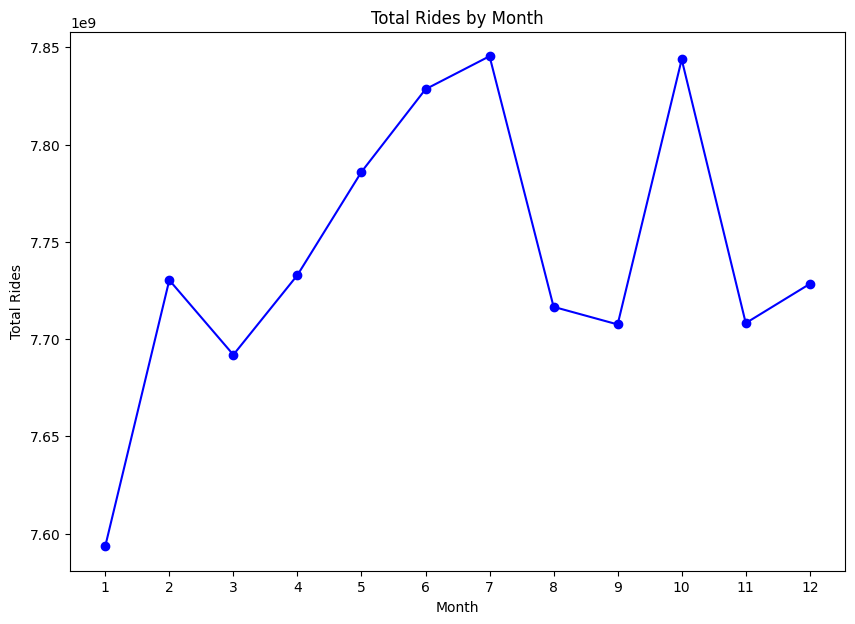

In [224]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(ride_df.index+1, ride_df['total_ride'], marker='o', linestyle='-', color='b', label='Total Rides')

plt.xticks(range(1, 13, 1))
plt.title('Total Rides by Month')
plt.xlabel('Month')
plt.ylabel('Total Rides')

plt.show()

### 2) 하차 통계

In [225]:
takeoff_columns = ['month']
takeoff_columns += [col for col in data.columns if '_takeoff' in col]
takeoff = data[takeoff_columns]
takeoff.head(3)

,month,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,12~13_takeoff,13~14_takeoff,14~15_takeoff,15~16_takeoff,16~17_takeoff,17~18_takeoff,18~19_takeoff,19~20_takeoff,20~21_takeoff,21~22_takeoff
0,202301,62,300,391,401,327,295,351,405,383,405,356,462,501,411,198,118
1,202301,59,271,366,364,285,318,288,435,407,335,344,545,473,337,172,165
4,202301,217,422,859,392,284,208,222,222,236,91,83,75,53,26,45,36


In [226]:
takeoff['total_takeoff'] = takeoff[takeoff_columns].sum(axis=1)
takeoff_df = takeoff.drop(takeoff.columns.difference(['month', 'total_takeoff']), axis=1)
takeoff_df

,month,total_takeoff
0,202301,207667
1,202301,207465
4,202301,205772
6,202301,206690
8,202301,205757
...,...,...
41669,202312,202325
41670,202312,202333
41671,202312,202359
41672,202312,202361


In [227]:
takeoff_df = takeoff_df.groupby('month')['total_takeoff'].sum().reset_index()
takeoff_df

,month,total_takeoff
0,202301,7590599297
1,202302,7727416705
2,202303,7688445526
3,202304,7729479349
4,202305,7782447647
5,202306,7825017582
6,202307,7841916006
7,202308,7713214689
8,202309,7704180972
9,202310,7840489682


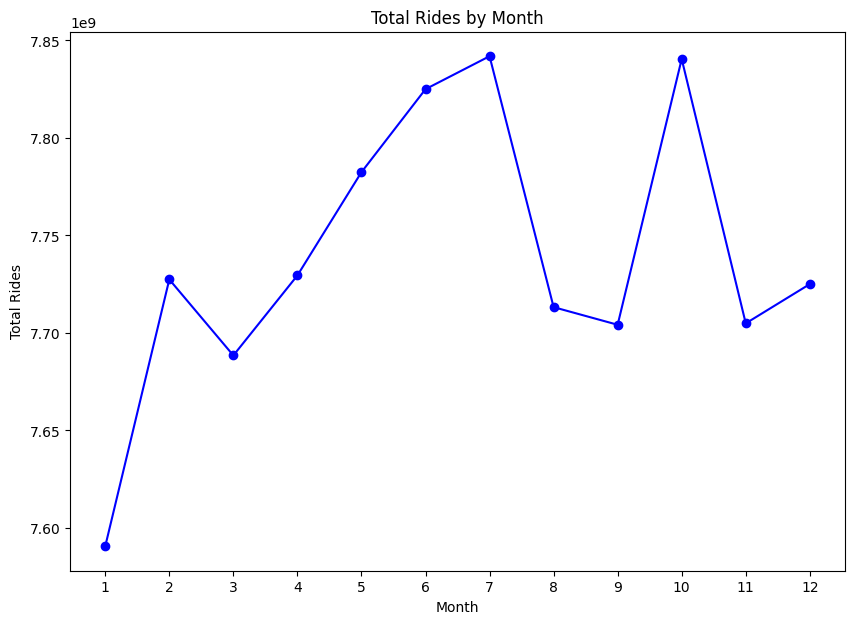

In [228]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(takeoff_df.index+1, takeoff_df['total_takeoff'], marker='o', linestyle='-', color='b', label='Total Rides')

plt.xticks(range(1, 13, 1))
plt.title('Total Rides by Month')
plt.xlabel('Month')
plt.ylabel('Total Rides')

plt.show()

### 3) 승하차와 평균기온 & 강수량 상관 관계

In [229]:
result = pd.concat([weather['강수량(mm)'], weather['평균기온(℃)'], ride_df['total_ride'], takeoff_df['total_takeoff']], axis=1)
result = result.rename(columns={'강수량(mm)': 'rain', '평균기온(℃)': 'temp'})
result

,rain,temp,total_ride,total_takeoff
0,47.9,-1.5,7593492812,7590599297
1,1.0,2.3,7730315781,7727416705
2,10.5,9.8,7691915225,7688445526
3,96.9,13.8,7732873593,7729479349
4,155.6,19.5,7785941145,7782447647
5,195.6,23.4,7828453955,7825017582
6,459.9,26.7,7845427921,7841916006
7,298.1,27.2,7716566367,7713214689
8,134.5,23.7,7707527331,7704180972
9,31.0,15.8,7843805765,7840489682


표준 정규화 수행

In [230]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(result[['rain', 'temp', 'total_ride', 'total_takeoff']])

result =  pd.DataFrame(scaled_features, columns=['rain', 'temp', 'total_ride', 'total_takeoff'])

print(result)

        rain      temp  total_ride  total_takeoff
0  -0.669819 -1.578518   -2.139289      -2.136795
1  -1.037958 -1.192770   -0.178096      -0.172462
2  -0.963388 -0.431428   -0.728522      -0.731984
3  -0.285196 -0.025378   -0.141432      -0.142848
4   0.175566  0.553242    0.619227       0.617636
5   0.489543  0.949141    1.228598       1.228827
6   2.564151  1.284132    1.471899       1.471443
7   1.294111  1.334888   -0.375177      -0.376365
8   0.009943  0.979594   -0.504741      -0.506065
9  -0.802474  0.177647    1.448648       1.450965
10 -0.402938 -0.735965   -0.494976      -0.495776
11 -0.371540 -1.314585   -0.206140      -0.206577


꺾은선 그래프

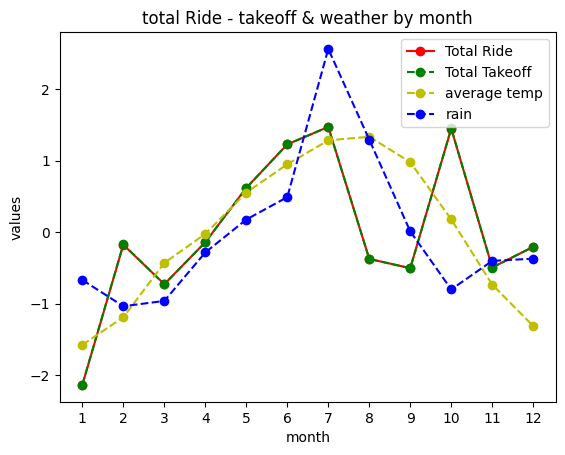

In [231]:
plt.plot(result.index+1, result['total_ride'], marker='o', linestyle='-', color='r', label='Total Ride')
plt.plot(result.index+1, result['total_takeoff'], marker='o', linestyle='--', color='g', label='Total Takeoff')
plt.plot(result.index+1, result['temp'], marker='o', linestyle='--', color='y', label='average temp')
plt.plot(result.index+1, result['rain'], marker='o', linestyle='--', color='b', label='rain')

plt.xticks(range(1, 13, 1))
plt.title('total Ride - takeoff & weather by month')
plt.xlabel('month')
plt.ylabel('values')
plt.legend()

plt.show()

heat 맵 그리기

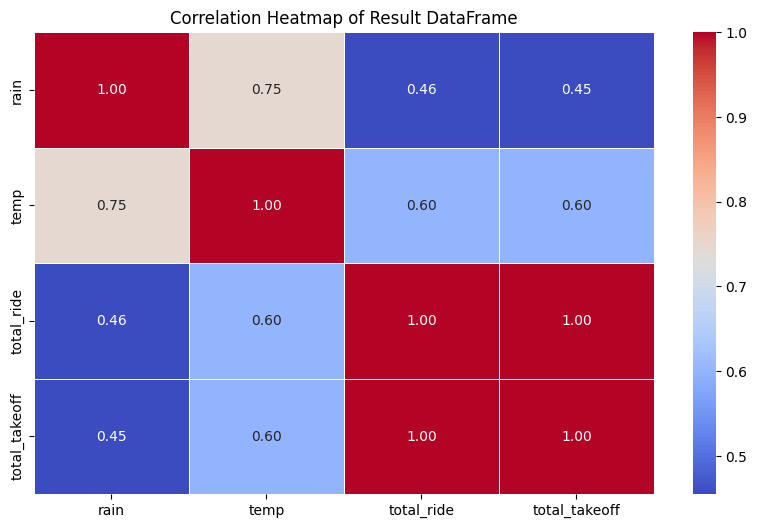

In [232]:
plt.figure(figsize=(10, 6))
sns.heatmap(result.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Result DataFrame')
plt.show()